In [25]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [26]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [27]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantData/Corn",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 7316 files belonging to 4 classes.


In [28]:
class_names = dataset.class_names
class_names

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy']

# VIsualiztion

(32, 256, 256, 3)
[0 1 0 0 0 2 3 1 2 2 3 2 3 3 3 1 2 3 3 3 0 2 1 1 0 3 2 2 3 2 1 3]


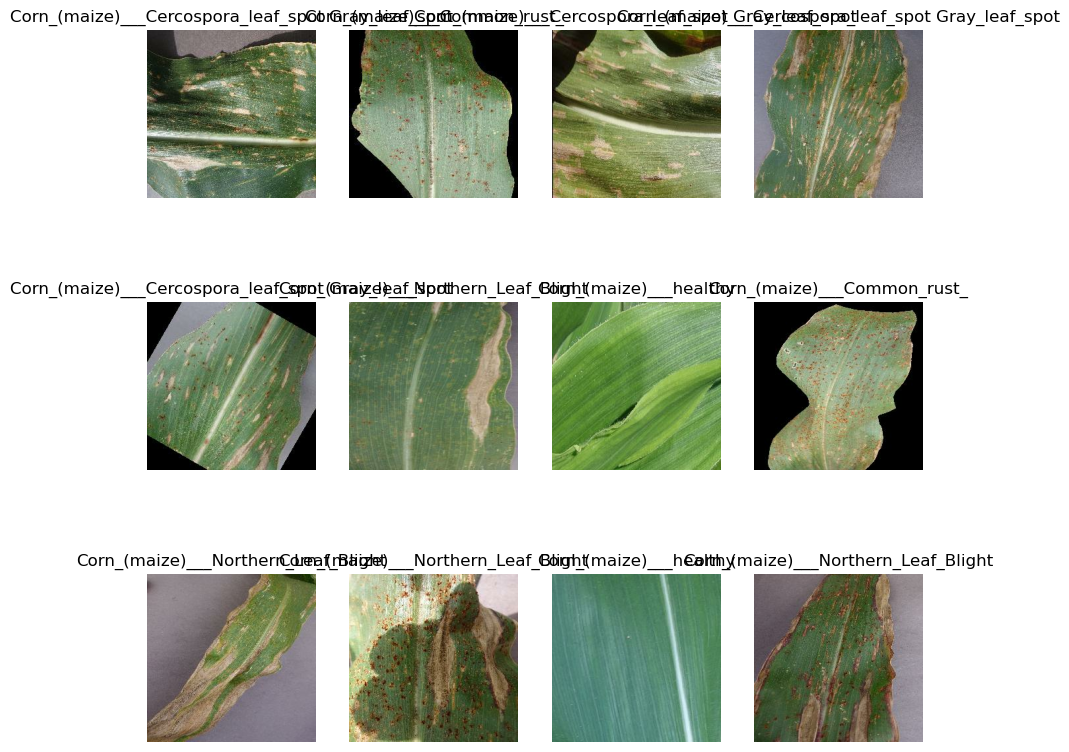

In [29]:
plt.figure(figsize = (10, 10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)

        plt.imshow(image_batch[i].numpy().astype("uint8"))

        plt.title(class_names[labels_batch[i]])

        plt.axis("off")

# training and testing

80 = training
10 = validation
10 = test

In [30]:
train_size = 0.8
len(dataset)*train_size

183.20000000000002

In [31]:
train_ds = dataset.take(54)
len(train_ds)

54

In [32]:
test_ds = dataset.skip(54)
len(test_ds)

175

In [33]:
val_size = 0.1
len(dataset)*val_size

22.900000000000002

In [34]:
test_ds = test_ds.skip(6)
len(test_ds)

169

In [35]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):

    assert(train_split+test_split+val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [36]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [37]:
len(train_ds)

183

In [38]:
len(val_ds)

22

In [39]:
len(test_ds)

24

In [40]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [41]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.58431375 0.74509805 0.7137255 ]
  [0.47843137 0.6392157  0.60784316]
  [0.5764706  0.7372549  0.7058824 ]
  ...
  [0.3019608  0.5176471  0.42745098]
  [0.2901961  0.5058824  0.41568628]
  [0.30588236 0.52156866 0.43137255]]

 [[0.5921569  0.7529412  0.72156864]
  [0.46666667 0.627451   0.59607846]
  [0.5568628  0.7176471  0.6862745 ]
  ...
  [0.3137255  0.5294118  0.4392157 ]
  [0.3019608  0.5176471  0.42745098]
  [0.31764707 0.53333336 0.44313726]]

 [[0.5803922  0.7411765  0.70980394]
  [0.46666667 0.627451   0.59607846]
  [0.5411765  0.7019608  0.67058825]
  ...
  [0.3137255  0.5294118  0.4392157 ]
  [0.3019608  0.5176471  0.42745098]
  [0.3137255  0.5294118  0.4392157 ]]

 ...

 [[0.6117647  0.59607846 0.5529412 ]
  [0.5803922  0.57254905 0.5254902 ]
  [0.5058824  0.52156866 0.46666667]
  ...
  [0.59607846 0.63529414 0.5921569 ]
  [0.47843137 0.48235294 0.4509804 ]
  [0.49019608 0.47843137 0.4509804 ]]

 [[0.5882353  0.5647059  0.5176471 ]
  [0.6        0.5921569  0.5411765 ]


In [42]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [43]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [44]:
IMAGE_SIZE

256

In [45]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape = input_shape)

In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [47]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [48]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1,
    epochs = EPOCHS
)

Epoch 1/50
183/183 [==============================] - 482s 2s/step - loss: 0.5150 - accuracy: 0.7572 - val_loss: 0.4567 - val_accuracy: 0.8253
Epoch 2/50
183/183 [==============================] - 408s 2s/step - loss: 0.2493 - accuracy: 0.9052 - val_loss: 0.2451 - val_accuracy: 0.8821
Epoch 3/50
183/183 [==============================] - 414s 2s/step - loss: 0.2009 - accuracy: 0.9235 - val_loss: 0.2315 - val_accuracy: 0.8864
Epoch 4/50
183/183 [==============================] - 397s 2s/step - loss: 0.1925 - accuracy: 0.9316 - val_loss: 0.2439 - val_accuracy: 0.8920
Epoch 5/50
183/183 [==============================] - 399s 2s/step - loss: 0.1583 - accuracy: 0.9370 - val_loss: 0.3281 - val_accuracy: 0.8565
Epoch 6/50
183/183 [==============================] - 396s 2s/step - loss: 0.1669 - accuracy: 0.9374 - val_loss: 0.2111 - val_accuracy: 0.9048
Epoch 7/50
183/183 [==============================] - 394s 2s/step - loss: 0.1429 - accuracy: 0.9449 - val_loss: 0.2616 - val_accuracy: 0.8963

In [49]:
len(test_ds)

24

In [50]:
scores = model.evaluate(test_ds)

24/24 [==============================] - 46s 578ms/step - loss: 0.0898 - accuracy: 0.9583


In [51]:
scores

[0.08975449949502945, 0.9583333134651184]

### Plotting the Accuracy and Loss Curves

In [52]:
history

In [53]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 183}

In [54]:
history.history.keys()    

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [55]:
len(history.history['loss'])

50

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [57]:
history.history['accuracy']

[0.7571868300437927,
 0.9052019119262695,
 0.923511266708374,
 0.9315537214279175,
 0.9370294213294983,
 0.9373716711997986,
 0.9449007511138916,
 0.9488363862037659,
 0.941478431224823,
 0.946269690990448,
 0.9522587060928345,
 0.9548254609107971,
 0.9534565210342407,
 0.9568788409233093,
 0.956536591053009,
 0.9548254609107971,
 0.9611567258834839,
 0.9635523557662964,
 0.9633812308311462,
 0.9656057357788086,
 0.9676591157913208,
 0.9635523557662964,
 0.9707392454147339,
 0.9673169255256653,
 0.9715948104858398,
 0.9719370007514954,
 0.9698836207389832,
 0.9707392454147339,
 0.9719370007514954,
 0.9674880504608154,
 0.9721081256866455,
 0.9715948104858398,
 0.975359320640564,
 0.9763860106468201,
 0.9739904403686523,
 0.9757015705108643,
 0.9751882553100586,
 0.9719370007514954,
 0.9731348156929016,
 0.9770705103874207,
 0.9772416353225708,
 0.977412760257721,
 0.9763860106468201,
 0.9768993854522705,
 0.9762149453163147,
 0.972621500492096,
 0.9789527654647827,
 0.9791238903999329,

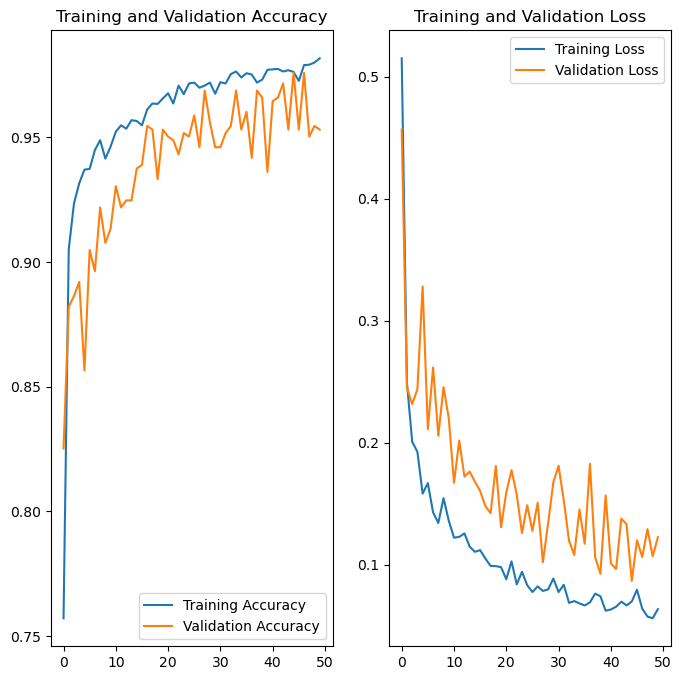

In [58]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Prediction on image

first image to predict
actual label: Corn_(maize)___Common_rust_
predicted label: Corn_(maize)___Common_rust_


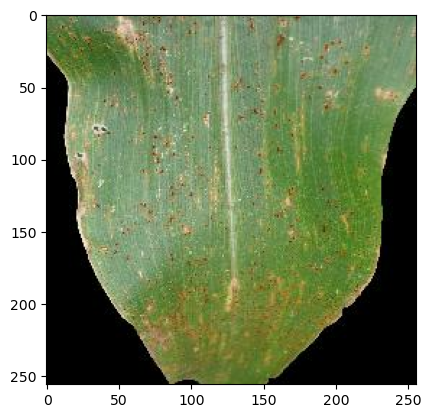

In [59]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

# Function for interference

In [60]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


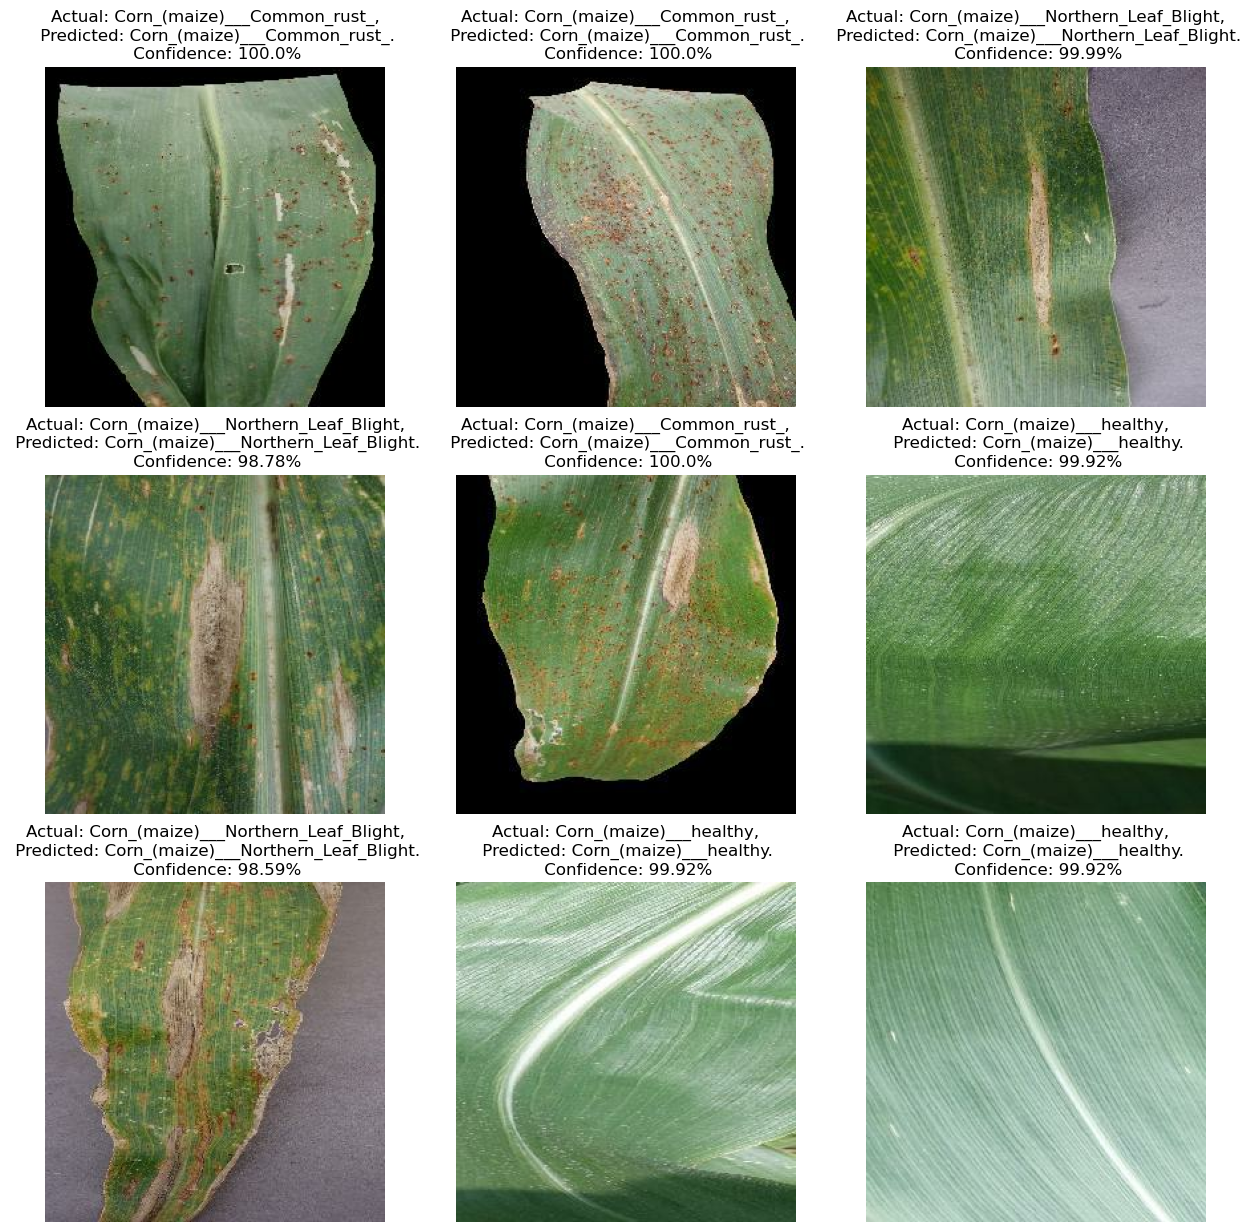

In [61]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(
            f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")


### Saving the Model
We append the model to the list of models as a new version

In [62]:
import os
model_version = max([int(i) for i in os.listdir("C:/Potato Project/training/models/Corn_models") + [0]])+1
model.save(f"C:/Potato Project/training/models/Corn_models/{model_version}")


INFO:tensorflow:Assets written to: C:/Potato Project/training/models/Corn_models/1\assets


In [63]:
model.save("../Corn.h5")
